In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 


In [2]:
df=pd.read_csv("accent.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   language  329 non-null    object 
 1   X1        329 non-null    float64
 2   X2        329 non-null    float64
 3   X3        329 non-null    float64
 4   X4        329 non-null    float64
 5   X5        329 non-null    float64
 6   X6        329 non-null    float64
 7   X7        329 non-null    float64
 8   X8        329 non-null    float64
 9   X9        329 non-null    float64
 10  X10       329 non-null    float64
 11  X11       329 non-null    float64
 12  X12       329 non-null    float64
dtypes: float64(12), object(1)
memory usage: 33.5+ KB


In [4]:
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


# EDA

In [5]:
df.isnull().sum()

language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         0
X11         0
X12         0
dtype: int64

In [6]:
#label_encoder = preprocessing.LabelEncoder()
#df['language']= label_encoder.fit_transform(df['language']) 

In [7]:
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [8]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()


In [9]:
df["language"].unique()

array(['ES', 'FR', 'GE', 'IT', 'UK', 'US'], dtype=object)

# ES-Spanish, FR-French,GE-German,IT-Italian,UK-English,US-English

In [10]:
X = onehotencoder.fit_transform(df.language.values.reshape(-1,1)).toarray()

In [11]:
X = np.array(X, dtype='int')


In [12]:
data=df
df.shape[1]
df


,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [13]:
dfOneHot = pd.DataFrame(X, columns =[ 0,1,2,3,4,5]) 
df = pd.concat([df, dfOneHot], axis=1)

In [14]:
df

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,0,1,2,3,4,5
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274,1,0,0,0,0,0
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857,1,0,0,0,0,0
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144,1,0,0,0,0,0
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441,1,0,0,0,0,0
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914,0,0,0,0,0,1
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113,0,0,0,0,0,1
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129,0,0,0,0,0,1
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275,0,0,0,0,0,1


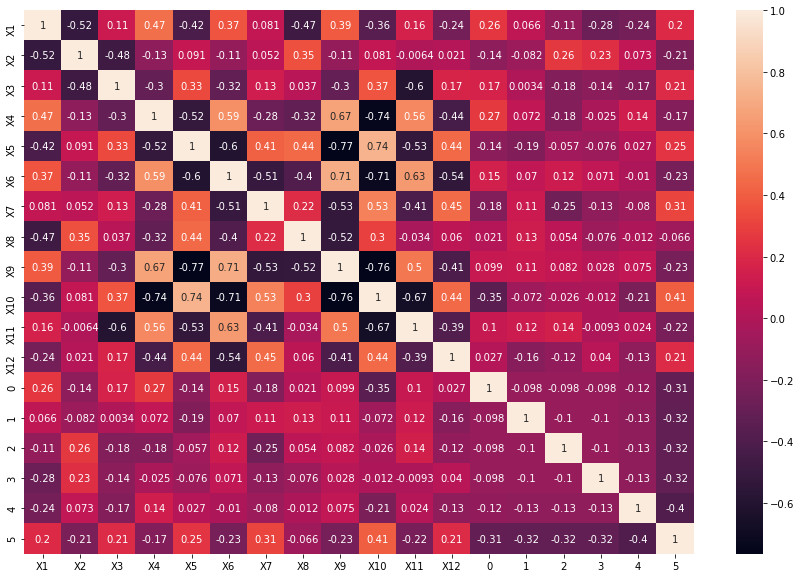

In [15]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
corr=df.corr()

In [17]:
corr>0.75

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,0,1,2,3,4,5
X1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
X2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
X3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
X4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
X5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
X6,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
X7,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
X8,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
X9,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
X10,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [18]:
corr<-0.75


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,0,1,2,3,4,5
X1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
X2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
X3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
X4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
X5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
X6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
X7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
X8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
X9,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
X10,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [19]:
df.drop(["X9","language"],axis=1,inplace=True)#multicollinearity

In [20]:
x = df.iloc[:, :-6]
y = df.iloc[:, 11:]

In [21]:
x

,X1,X2,X3,X4,X5,X6,X7,X8,X10,X11,X12
0,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,-2.812753,0.866538,-5.244274
1,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,-4.508811,2.332147,-6.221857
2,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-7.204041,-0.011847,-6.463144
3,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-6.019237,1.358559,-6.356441
4,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...
324,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,7.129909,0.209947,-1.946914
325,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,6.728373,2.461446,-0.026113
326,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,7.566142,-0.606010,-2.245129
327,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,4.664406,1.197789,-2.230275


In [22]:
y

,0,1,2,3,4,5
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
324,0,0,0,0,0,1
325,0,0,0,0,0,1
326,0,0,0,0,0,1
327,0,0,0,0,0,1


# logistic regression model

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [25]:
log_reg = LogisticRegression()

0 model: 
model coeff [[ 0.00805923 -0.02810703  0.17823955  0.50562341 -0.53214109  0.74954015
  -0.76018662  0.43536765 -0.72313715  0.01560598  0.60064446]] 
model intecept [-32.27881852]

predicted values [0 0 0 0 0]

modelscore 0.9739130434782609

 confusion matrix


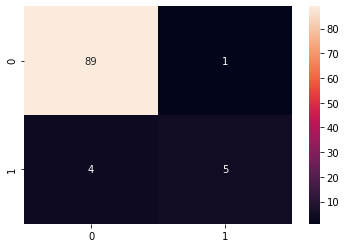

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.83      0.56      0.67         9

    accuracy                           0.95        99
   macro avg       0.90      0.77      0.82        99
weighted avg       0.95      0.95      0.94        99

1 model: 
model coeff [[-0.34366525 -0.3005172  -0.07520244  0.34177339 -0.89559924  0.3360601
   0.41907087  0.70421747  0.46898129  0.18246837 -0.21951702]] 
model intecept [-14.34235361]

predicted values [0 0 0 0 0]

modelscore 0.908695652173913

 confusion matrix


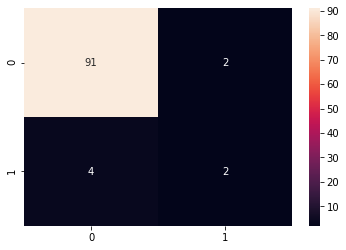

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.50      0.33      0.40         6

    accuracy                           0.94        99
   macro avg       0.73      0.66      0.68        99
weighted avg       0.93      0.94      0.93        99

2 model: 
model coeff [[ 0.1129696   0.52650613  0.10898606 -0.68435879  0.03049495  0.47887973
  -0.73692347 -0.1007125   0.07743047  0.59535022  0.22863738]] 
model intecept [-10.55432961]

predicted values [0 0 0 0 0]

modelscore 0.9608695652173913

 confusion matrix


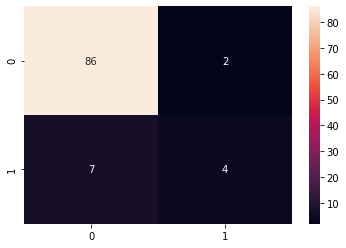

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        88
           1       0.67      0.36      0.47        11

    accuracy                           0.91        99
   macro avg       0.80      0.67      0.71        99
weighted avg       0.90      0.91      0.90        99

3 model: 
model coeff [[-0.62466405  0.15778284 -0.06297049  0.18727525 -0.48992242  0.60626974
  -0.37739696 -0.29765254 -0.01701998 -0.03984005  0.20532005]] 
model intecept [-12.36200285]

predicted values [0 0 0 0 1]

modelscore 0.9217391304347826

 confusion matrix


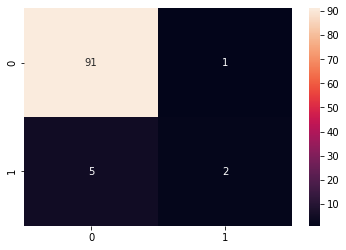

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        92
           1       0.67      0.29      0.40         7

    accuracy                           0.94        99
   macro avg       0.81      0.64      0.68        99
weighted avg       0.93      0.94      0.93        99

4 model: 
model coeff [[-0.80015759 -0.60625237 -0.52237797  0.16477334  0.30371884 -0.34188593
   0.40394758 -0.37455062 -1.01525158 -0.38092147 -0.85933724]] 
model intecept [3.27218252]

predicted values [0 0 0 0 1]

modelscore 0.9391304347826087

 confusion matrix


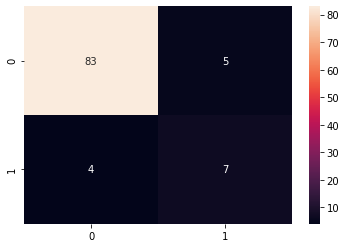

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        88
           1       0.58      0.64      0.61        11

    accuracy                           0.91        99
   macro avg       0.77      0.79      0.78        99
weighted avg       0.91      0.91      0.91        99

5 model: 
model coeff [[ 0.4469264   0.16602606  0.2588626  -0.08666718  0.2657247  -0.33202459
   0.01996835 -0.33893575  0.47891651  0.12914166  0.18599445]] 
model intecept [7.2908869]

predicted values [0 0 0 0 0]

modelscore 0.8130434782608695

 confusion matrix


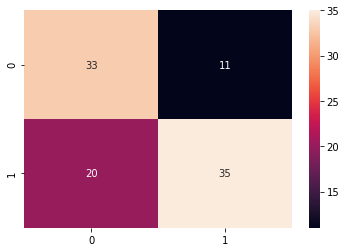

              precision    recall  f1-score   support

           0       0.62      0.75      0.68        44
           1       0.76      0.64      0.69        55

    accuracy                           0.69        99
   macro avg       0.69      0.69      0.69        99
weighted avg       0.70      0.69      0.69        99



In [26]:
for i in y_train:
    model = log_reg.fit(X_train,y_train[i])
    print(i,"model:","\nmodel coeff", model.coef_,"\nmodel intecept",model.intercept_)
    y_hat = model.predict(X_test)
    print("\npredicted values",y_hat[:5])
    print("\nmodelscore",model.score(X_train,y_train[i]))
    cm = confusion_matrix(y_test[i], y_hat)
    print("\n confusion matrix")
    sns.heatmap(pd.DataFrame(cm), annot = True, fmt = 'g')
    
    plt.show()
    print(classification_report(y_test[i], y_hat))

# Randomforest classification

In [51]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_params={'max_depth':[1,2,3,4,5,6,7,8,9,10],
              'max_features':(1,2,3,4,5,6,7,8,9,10),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':(1,2,3,5,7,8,9,10),'n_estimators':[100,200,300,400,500,600,700]
              }

from sklearn.model_selection import RandomizedSearchCV
gd_sr = RandomizedSearchCV(clf, rf_params,5, random_state = 0)
search = gd_sr.fit(X_train, y_train)
search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_iter=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


{'n_estimators': 600,
 'min_samples_leaf': 3,
 'max_features': 5,
 'max_depth': 4,
 'criterion': 'gini',
 'bootstrap': False}

In [52]:
clf=RandomForestClassifier(n_estimators=600,min_samples_leaf= 5,max_features= 6,max_depth= 10,criterion= 'gini',bootstrap= True)

0 model 
Accuracy: 0.9696969696969697

predicted values [0 0 0 0 0]
Feature: 0, Score: 0.12823
Feature: 1, Score: 0.01561
Feature: 2, Score: 0.06601
Feature: 3, Score: 0.07328
Feature: 4, Score: 0.04962
Feature: 5, Score: 0.06392
Feature: 6, Score: 0.13882
Feature: 7, Score: 0.01319
Feature: 8, Score: 0.40379
Feature: 9, Score: 0.02890
Feature: 10, Score: 0.01863

 confusion matrix
 [[38  6]
 [15 40]]
<BarContainer object of 11 artists>


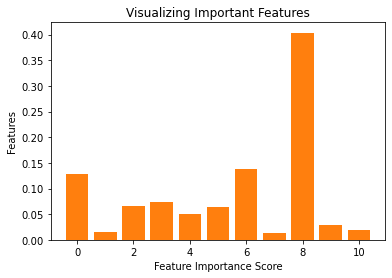


               precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.67      0.80         9

    accuracy                           0.97        99
   macro avg       0.98      0.83      0.89        99
weighted avg       0.97      0.97      0.97        99

1 model 
Accuracy: 0.9393939393939394

predicted values [0 0 0 0 0]
Feature: 0, Score: 0.07763
Feature: 1, Score: 0.05596
Feature: 2, Score: 0.01693
Feature: 3, Score: 0.02641
Feature: 4, Score: 0.21735
Feature: 5, Score: 0.20298
Feature: 6, Score: 0.05204
Feature: 7, Score: 0.17345
Feature: 8, Score: 0.09804
Feature: 9, Score: 0.03530
Feature: 10, Score: 0.04391

 confusion matrix
 [[38  6]
 [15 40]]
<BarContainer object of 11 artists>


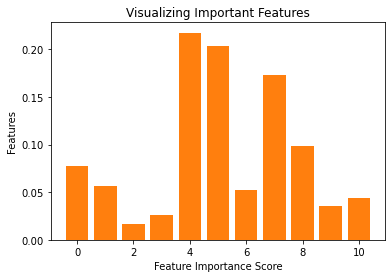


               precision    recall  f1-score   support

           0       0.95      0.99      0.97        93
           1       0.50      0.17      0.25         6

    accuracy                           0.94        99
   macro avg       0.72      0.58      0.61        99
weighted avg       0.92      0.94      0.92        99

2 model 
Accuracy: 0.9191919191919192

predicted values [0 0 0 0 0]
Feature: 0, Score: 0.04034
Feature: 1, Score: 0.17178
Feature: 2, Score: 0.05723
Feature: 3, Score: 0.21445
Feature: 4, Score: 0.04365
Feature: 5, Score: 0.09626
Feature: 6, Score: 0.18110
Feature: 7, Score: 0.02329
Feature: 8, Score: 0.03295
Feature: 9, Score: 0.12458
Feature: 10, Score: 0.01435

 confusion matrix
 [[38  6]
 [15 40]]
<BarContainer object of 11 artists>


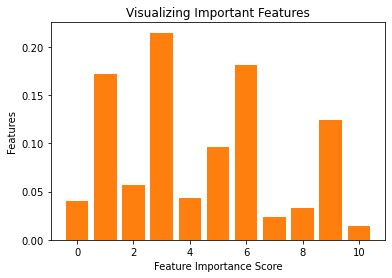


               precision    recall  f1-score   support

           0       0.92      1.00      0.96        88
           1       1.00      0.27      0.43        11

    accuracy                           0.92        99
   macro avg       0.96      0.64      0.69        99
weighted avg       0.93      0.92      0.90        99

3 model 
Accuracy: 0.9292929292929293

predicted values [0 0 0 0 0]
Feature: 0, Score: 0.19549
Feature: 1, Score: 0.07166
Feature: 2, Score: 0.03489
Feature: 3, Score: 0.04219
Feature: 4, Score: 0.13594
Feature: 5, Score: 0.10134
Feature: 6, Score: 0.10653
Feature: 7, Score: 0.10870
Feature: 8, Score: 0.05785
Feature: 9, Score: 0.09349
Feature: 10, Score: 0.05191

 confusion matrix
 [[38  6]
 [15 40]]
<BarContainer object of 11 artists>


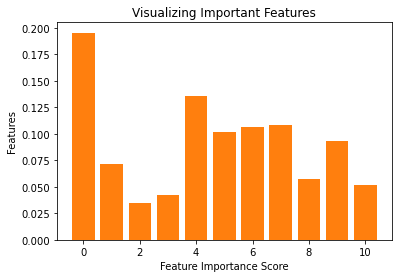


               precision    recall  f1-score   support

           0       0.93      1.00      0.96        92
           1       0.00      0.00      0.00         7

    accuracy                           0.93        99
   macro avg       0.46      0.50      0.48        99
weighted avg       0.86      0.93      0.90        99



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4 model 
Accuracy: 0.898989898989899

predicted values [0 0 0 0 0]
Feature: 0, Score: 0.21803
Feature: 1, Score: 0.03978
Feature: 2, Score: 0.06349
Feature: 3, Score: 0.14271
Feature: 4, Score: 0.06029
Feature: 5, Score: 0.05097
Feature: 6, Score: 0.02952
Feature: 7, Score: 0.04879
Feature: 8, Score: 0.19386
Feature: 9, Score: 0.04504
Feature: 10, Score: 0.10751

 confusion matrix
 [[38  6]
 [15 40]]
<BarContainer object of 11 artists>


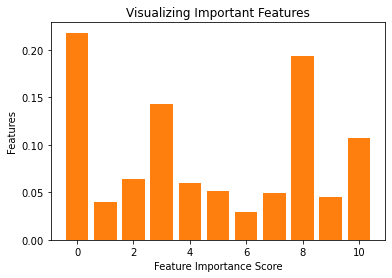


               precision    recall  f1-score   support

           0       0.90      1.00      0.95        88
           1       1.00      0.09      0.17        11

    accuracy                           0.90        99
   macro avg       0.95      0.55      0.56        99
weighted avg       0.91      0.90      0.86        99

5 model 
Accuracy: 0.7575757575757576

predicted values [0 1 0 1 0]
Feature: 0, Score: 0.15898
Feature: 1, Score: 0.03506
Feature: 2, Score: 0.03775
Feature: 3, Score: 0.04478
Feature: 4, Score: 0.09387
Feature: 5, Score: 0.08454
Feature: 6, Score: 0.08833
Feature: 7, Score: 0.14992
Feature: 8, Score: 0.21311
Feature: 9, Score: 0.05291
Feature: 10, Score: 0.04075

 confusion matrix
 [[38  6]
 [15 40]]
<BarContainer object of 11 artists>


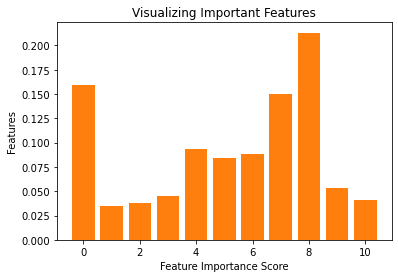


               precision    recall  f1-score   support

           0       0.69      0.84      0.76        44
           1       0.84      0.69      0.76        55

    accuracy                           0.76        99
   macro avg       0.76      0.77      0.76        99
weighted avg       0.77      0.76      0.76        99



In [53]:
ypred=pd.DataFrame() 
for i in y_train:
    clf.fit(X_train,y_train[i])
    y_pred=clf.predict(X_test)
    ypred[i]=y_pred.tolist()
    print(i,"model","\nAccuracy:",metrics.accuracy_score(y_test[i], y_pred)) 
    print("\npredicted values",y_pred[:5])
    importance = clf.feature_importances_
# summarize feature importance
    for j,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (j,v))
# plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    #cm = confusion_matrix(y_test[i], y_pred)
    print("\n confusion matrix\n",cm)
    #print(sns.heatmap(pd.DataFrame(cm), annot = True, fmt = 'g'))
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    print(plt.bar([x for x in range(len(importance))], importance))
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    print("\n",classification_report(y_test[i],y_pred))
    
    
    

In [54]:
col=list(X_train)

In [55]:
pred=onehotencoder.inverse_transform(ypred)

In [56]:
pred

array([['ES'],
       ['US'],
       ['ES'],
       ['US'],
       ['ES'],
       ['ES'],
       ['ES'],
       ['ES'],
       ['GE'],
       ['US'],
       ['ES'],
       ['ES'],
       ['US'],
       ['ES'],
       ['US'],
       ['ES'],
       ['ES'],
       ['US'],
       ['US'],
       ['ES'],
       ['FR'],
       ['US'],
       ['ES'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['ES'],
       ['US'],
       ['ES'],
       ['ES'],
       ['US'],
       ['US'],
       ['US'],
       ['ES'],
       ['ES'],
       ['US'],
       ['ES'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['GE'],
       ['ES'],
       ['US'],
       ['US'],
       ['ES'],
       ['ES'],
       ['ES'],
       ['ES'],
       ['US'],
       ['ES'],
       ['US'],
       ['ES'],
       ['ES'],
       ['ES'],
       ['ES'],
       ['ES'],
       ['ES'],
       ['ES'],
       ['ES'],
       ['ES'],
       ['ES'],
       ['US'],
       ['ES'],
       ['ES'],
       ['E